In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np

In [2]:
str_filename = '333_sales.csv'

In [3]:
fh = open(str_filename)
csv_reader = csv.reader(fh)

In [4]:
csv_header = next(csv_reader)
csv_header

['block_time',
 'project_addresss',
 'eth_price',
 'usd_price',
 'link',
 'platform',
 'seller',
 'buyer']

In [5]:
fh.close()

In [6]:
df_sig = pd.read_csv(str_filename, header=None, skiprows=1, names=csv_header)
df_sig


,block_time,project_addresss,eth_price,usd_price,link,platform,seller,buyer
0,2022-07-28 20:03:58,ArtBlocks,2.29,3959.0894,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\xba0b0,\xa5fd7
1,2022-07-28 18:49:32,ArtBlocks,2.15,NaN,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\x3f3e2,\x53dda
2,2022-07-28 18:37:24,ArtBlocks,1.90,NaN,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\xbf0cd,\x95298
3,2022-07-28 18:29:41,ArtBlocks,2.29,NaN,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\x5fd2c,\x0f02b
4,2022-07-28 18:00:49,ArtBlocks,3.80,6590.4160,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\x4c54d,\xb9da9
...,...,...,...,...,...,...,...,...
199,2022-07-27 17:26:20,ArtBlocks,2.65,3949.0565,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\x39af7,\x0d2e9
200,2022-07-27 17:26:20,ArtBlocks,2.65,3949.0565,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\xbb7c9,\xf6ace
201,2022-07-27 17:26:20,ArtBlocks,2.80,4172.5880,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\x50dee,\x296e0
202,2022-07-27 17:25:53,ArtBlocks,2.70,4023.4860,"<a href=""https://opensea.io/assets/0xa7d8d9ef8...",OpenSea,\xc31e0,\xaec60


In [7]:
df_sig['Date'] = df_sig['block_time'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
df_sig['Date']

0     2022-07-28 20:03:58
1     2022-07-28 18:49:32
2     2022-07-28 18:37:24
3     2022-07-28 18:29:41
4     2022-07-28 18:00:49
              ...        
199   2022-07-27 17:26:20
200   2022-07-27 17:26:20
201   2022-07-27 17:26:20
202   2022-07-27 17:25:53
203   2022-07-27 17:25:10
Name: Date, Length: 204, dtype: datetime64[ns]

Text(0, 0.5, 'eth_price(eth)')

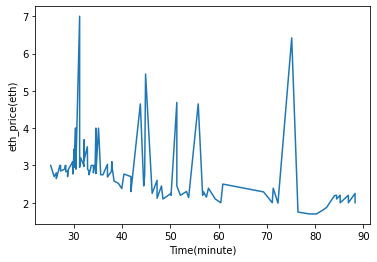

In [8]:
mintStart = datetime(2022,7,27,17,0,0)
endDate = datetime(2022,7,27,18,30,0)
df_new=df_sig.loc[(df_sig['Date'] <= endDate)]
x = df_new['Date'] - mintStart
x = (x.dt.total_seconds() / 60)
y = df_new['eth_price']
plt.plot(x, y)
plt.xlabel('Time(minute)')
plt.ylabel('eth_price(eth)')